In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings("ignore")

sns.set(style='whitegrid')

In [4]:
df = pd.read_csv("../data/external/AIML Dataset.csv")

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
4383770,312,CASH_OUT,151391.53,C2082512038,0.0,0.0,C1096924958,3774639.24,3926030.77,0,0


In [5]:
df.sample(10)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
3478309,258,CASH_IN,291584.93,C452168200,9008868.47,9300453.40,C1560834469,1311643.05,1020058.12,0,0
2893315,228,CASH_OUT,74390.55,C743235460,0.00,0.00,C186888833,318638.86,393029.41,0,0
3302652,252,CASH_OUT,154423.49,C596318409,0.00,0.00,C666602095,820651.71,1260525.95,0,0
1230483,133,PAYMENT,3002.38,C920570484,32828.00,29825.62,M1109232061,0.00,0.00,0,0
5863901,403,PAYMENT,9598.92,C2116730485,16016.00,6417.08,M783861033,0.00,0.00,0,0
2708618,211,PAYMENT,6972.27,C1763635349,34982.00,28009.73,M285720586,0.00,0.00,0,0
956748,44,CASH_OUT,396291.08,C1339885810,0.00,0.00,C497219026,3823115.80,4219406.89,0,0
57325,9,TRANSFER,1299820.47,C1506231016,15792.00,0.00,C46229814,229621.48,4442529.94,0,0
683012,36,PAYMENT,2642.16,C695957762,0.00,0.00,M1173073342,0.00,0.00,0,0
1905182,165,PAYMENT,17430.23,C1511100240,79531.00,62100.77,M497689524,0.00,0.00,0,0


In [6]:
df.head(5)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [8]:
df.columns

Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud'],
      dtype='object')

In [12]:
df['isFraud'].value_counts()

isFraud
0    6354407
1       8213
Name: count, dtype: int64

In [16]:
df.isnull().sum().sum()

0

In [18]:
df.shape

(6362620, 11)

In [26]:
round ((df['isFraud'].value_counts()[1]/ df.shape[0]) * 100, 2)


0.13

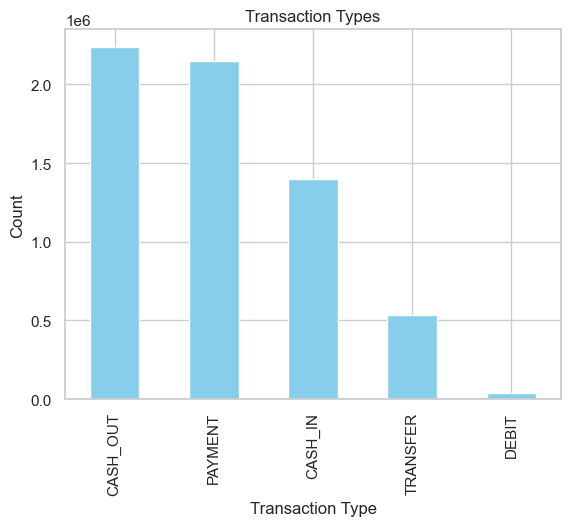

In [29]:
df['type'].value_counts().plot(kind='bar', title='Transaction Types', color= "skyblue")
plt.xlabel('Transaction Type')
plt.ylabel('Count')
plt.show()


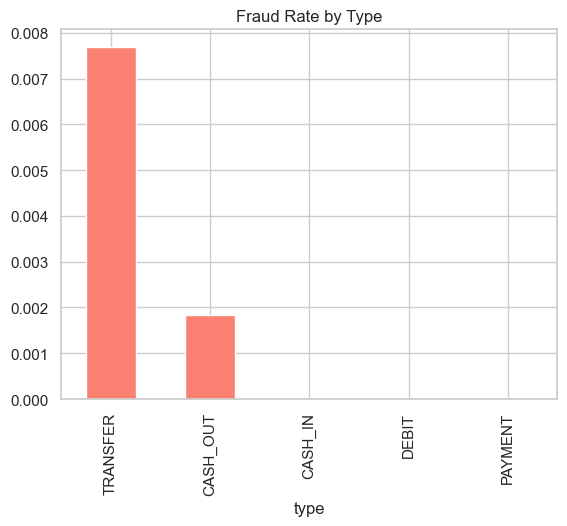

In [30]:
fraud_by_type = df.groupby("type")["isFraud"].mean().sort_values(ascending=False)
fraud_by_type.plot(kind='bar', title="Fraud Rate by Type", color='salmon')
plt.show()

In [31]:
fraud_by_type

type
TRANSFER    0.007688
CASH_OUT    0.001840
CASH_IN     0.000000
DEBIT       0.000000
PAYMENT     0.000000
Name: isFraud, dtype: float64

In [34]:
df["amount"].describe().astype(int)

count     6362620
mean       179861
std        603858
min             0
25%         13389
50%         74871
75%        208721
max      92445516
Name: amount, dtype: int64